In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
from datascience import *
import pandas as pd

So this is current work. parks (below) is the first 1000 rows of the dataset we have.

We have a couple of issues atm but basically what I want to do is be able to say that given some date in the future, what is the chance that the nearby meters are open based on past data. I want to have a table where the rows are dates/times and the columns are meters and that we can call this table for our model.

One issue is some of the Parking Start Datesand End Dates are the same. I've contacted the city about that but for now im assuming we can proxy it by writing some code to use their parking meter fees ($1 per hour to proxy the time spent)


* Segment by DoW, Hour, Month (onehot) predict by geohash, (predict number of meters filled - where there are nearby areas of high parking)

In [2]:
import pandas as pd
parks = pd.read_csv('parking_meters_data_2015_2017.csv')
parks

,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit
0,SI83,1/1/2015 0:09,1/1/2015 0:09,Cash,0.50
1,UE255,1/1/2015 0:21,1/1/2015 0:21,Cash,0.75
2,EG6,1/1/2015 0:26,1/1/2015 0:26,Cash,0.05
3,EG6,1/1/2015 0:27,1/1/2015 0:27,Cash,0.05
4,UE242,1/1/2015 0:27,1/1/2015 0:27,Cash,0.25
5,B221,1/1/2015 0:45,1/1/2015 0:45,Cash,0.10
6,UE229,1/1/2015 0:51,1/1/2015 0:51,Cash,0.30
7,SG131,1/1/2015 1:03,1/1/2015 1:03,Cash,0.80
8,SG131,1/1/2015 1:03,1/1/2015 1:03,Cash,0.50
9,SO305,1/1/2015 1:22,1/1/2015 1:52,Cash,0.70


In [3]:
#THIS CODE LETS US See the difference between the start and end time.

from datetime import datetime
from dateutil import parser


diff = []
for each in range(1000):
    dtstart = parser.parse(parks['ParkingStartDate'][each])
    dtend = parser.parse(parks['ParkingEndDate'][each])
    diff.append(dtend-dtstart)
#datetime_object = datetime.strptime(parks['ParkingStartDate'][0], '%b/%d/%Y %I:%M')

In [4]:
parks["Diff"] = diff

In [350]:
time_changed_parks = parks[parks["Diff"] != (parks["Diff"][0])]
len(time_changed_parks)

188

In [349]:
#THIS IS THE 1000 ROWS FROM EARLIER WITHOUT THE ONES WITH ZERO TIME DIFF
time_changed_parks.tail(5)


,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,Diff,count
956,SO305,1/1/2015 18:30,1/1/2015 18:48,Cash,0.25,00:18:00,1.0
987,SO307,1/1/2015 19:04,1/1/2015 19:19,Cash,0.25,00:15:00,1.0
996,SO305,1/1/2015 19:13,1/1/2015 19:43,Cash,0.50,00:30:00,1.0
997,SO307,1/1/2015 19:14,1/1/2015 19:22,Cash,0.05,00:08:00,1.0
998,SO307,1/1/2015 19:14,1/1/2015 19:44,Cash,0.90,00:30:00,1.0


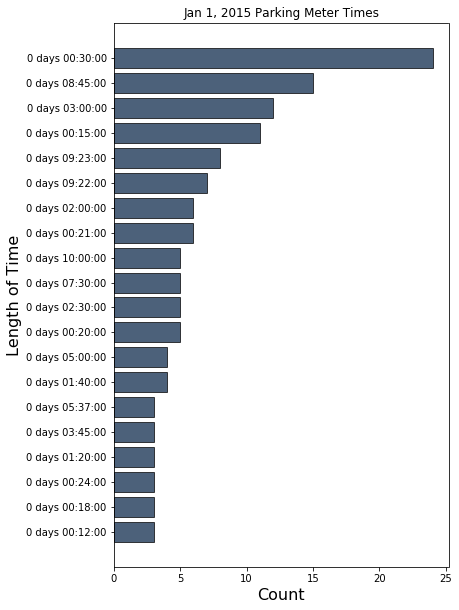

In [17]:
#THIS IS WHAT THE MOST COMMON TIME DIFFS WERE
ex = Table().from_df(time_changed_parks).group('Diff', sum).select(0,6)
ex.sort('count sum',descending=True).take(np.arange(20)).barh("Diff", "count sum")
plt.title('Jan 1, 2015 Parking Meter Times')
plt.xlabel('Count')
plt.ylabel('Length of Time')
plt.show()

In [18]:
#THIS IS IMPORTANT: PM IS ALL THE METERS IN COLUMBUS.
pm = Table.read_table('Parking_Meters.csv')
pm

X,Y,OBJECTID,METER_ID,LOCATION,SIDE_OF_STREET,BLOCKFACE,METER_STATUS,TOW_AWAY_HOURS,METER_TIME,HANDICAP,HOURS_OPERATION,IN_SERVICE,VALET_HOURS,RATE,FOOD_SERVICE_HOURS,TAXI_ZONE_HOURS,CHARGING_STATION,CHARGING_STATION_STATUS
-83.0103,39.9603,6111,C401,STARLING ST S,West,CAPITAL ST - RUSH AL,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0103,39.9602,6112,C403,STARLING ST S,West,CAPITAL ST - RUSH AL,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0087,39.9578,5495,C867,TOWN ST W,South,BELLE ST - STARLING ST,Meter & Post Removed,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0086,39.9578,5494,C869,TOWN ST W,South,BELLE ST - STARLING ST,Meter & Post Removed,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0085,39.9578,5493,C871,TOWN ST W,South,BELLE ST - STARLING ST,Meter & Post Removed,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0087,39.9592,6110,C728,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0088,39.9592,6109,C730,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0089,39.9592,6108,C732,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0092,39.9592,6106,C738,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0093,39.9592,6105,C740,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan


In [339]:
#THIS IS THE HOURS OF OPERATION
np.unique(pm["HOURS_OPERATION"])

array(['10 AM - 6 PM', '4 PM - 10 PM', '6 AM - 10 PM',
       '6 AM - 10 PM MON - SAT', '6 AM - 10 PM-M-S', '6 AM - 6 PM',
       '6 PM - 10 PM', '8 AM - 10 PM', '8 AM - 4 PM', '8 AM - 5 PM',
       '8 AM - 6 PM', '8 AM - 8 PM', '8 AM - 9 PM',
       '8AM - 10AM & 4PM - 10PM', '8AM - 4PM & 6PM - 10PM',
       '8AM - 5PM & 5PM - 10PM', '8AM-3PM-6PM-10PM', '8AM-4PM-6PM-10PM',
       '8AM-5PM', '9 AM - 10 PM', '9 AM - 3 PM', '9 AM - 4 PM',
       '9AM - 3PM & 6PM - 10PM', '9AM - 4PM & 6PM - 10PM',
       '9AM-4PM-6PM-10PM', 'nan'], dtype='<U23')

In [354]:
#THIS IS THE COORDINATES OF EACH METER
shortpm = pm.select(0,1,3).to_df()
shortpm.head(5)

,X,Y,METER_ID
0,-83.010278,39.960264,C401
1,-83.010269,39.960203,C403
2,-83.008661,39.957754,C867
3,-83.008583,39.957763,C869
4,-83.008515,39.957769,C871


Text(0.5, 1.0, 'Plotted Parking Meters On Jan 1 in Columbus')

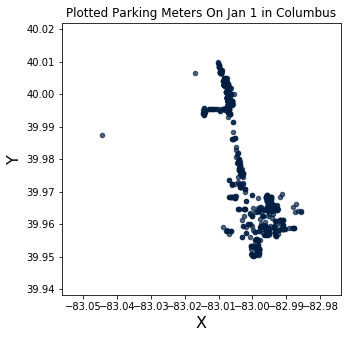

In [21]:
# PLOTTED METERS IN Columbus, OH
parksDS = Table().from_df(parks)
finalDS = parksDS.join('Pole', shortpm, "METER_ID")
finalDS.scatter('X', "Y")
plt.title('Plotted Parking Meters On Jan 1 in Columbus')

# #THIS IS MY ATTEMPT AT GIS MAPPING THE SPOTS

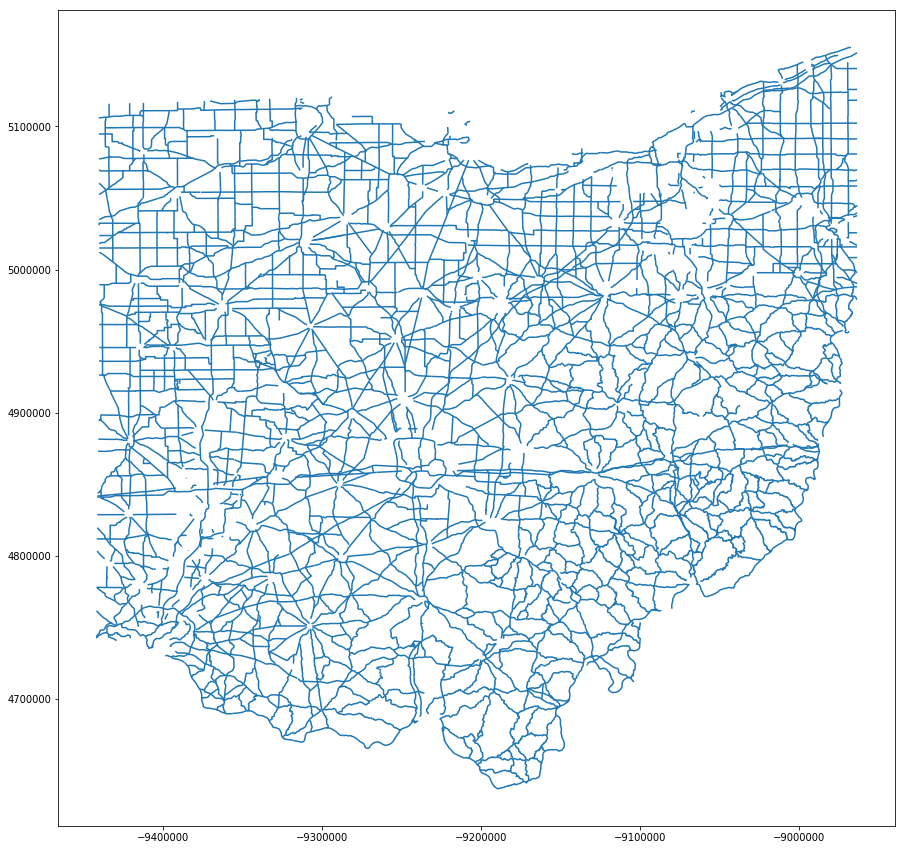

In [87]:
#THIS IS MY ATTEMPT AT GIS MAPPING THE SPOTS
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
street_map = gpd.read_file('WGIS_SNOW_ICE.shp')
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [91]:
final = finalDS.to_df()
geomtrey = [Point(xy) for xy in zip(final["Y"], final["X"])]

In [127]:
crs = {'init': 'epsg:4326'}
crs

{'init': 'epsg:4326'}

In [117]:
geoDF = gpd.GeoDataFrame(final, crs=crs, geometry=geomtrey)
geoDF.tail()

,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,Diff,X,Y,geometry
985,WX161,1/1/2015 13:43,1/1/2015 13:43,Cash,0.25,0 days,-83.006212,39.968411,POINT (39.96841098150934 -83.00621186037043)
986,WX163,1/1/2015 14:05,1/1/2015 14:05,Cash,0.35,0 days,-83.006277,39.968404,POINT (39.96840430119906 -83.00627704461081)
987,WX171,1/1/2015 14:25,1/1/2015 14:25,Cash,0.75,0 days,-83.006640,39.968361,POINT (39.96836093232832 -83.00663972624859)
988,WX175,1/1/2015 10:06,1/1/2015 10:06,Cash,0.50,0 days,-83.006807,39.968343,POINT (39.96834275656712 -83.00680695240848)
989,WX175,1/1/2015 10:07,1/1/2015 10:07,Cash,0.25,0 days,-83.006807,39.968343,POINT (39.96834275656712 -83.00680695240848)


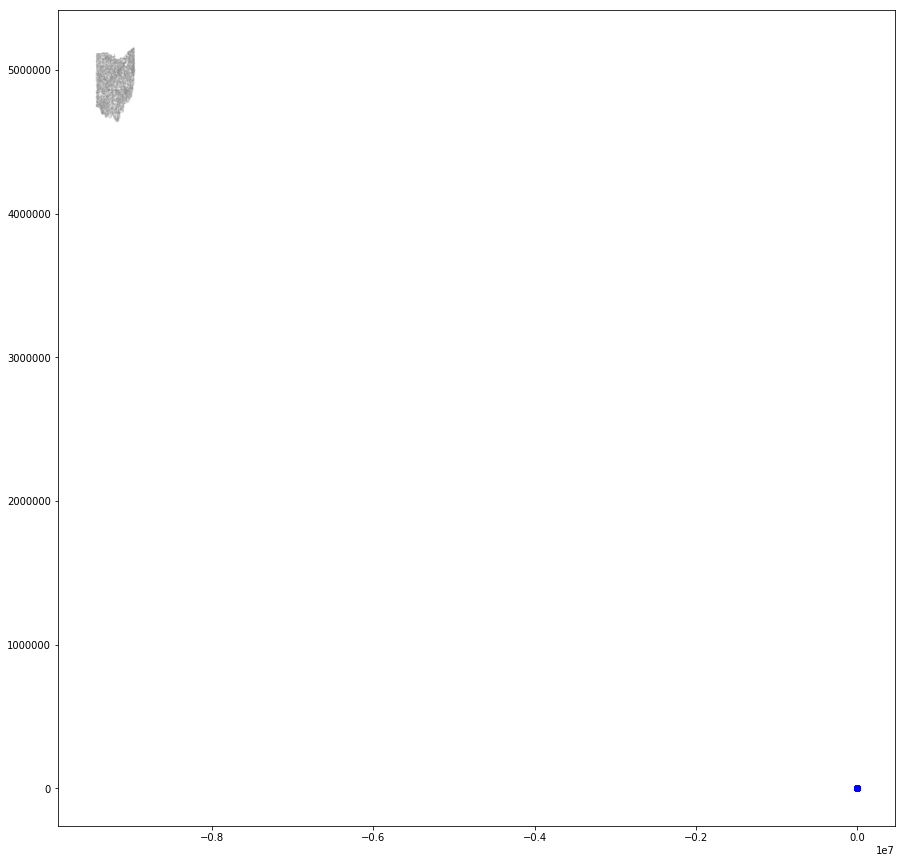

In [126]:
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha=.3, color='grey')
geoDF[geoDF["Y"]>32].plot(ax=ax, markersize=25, color='blue')


In [115]:

pd.options.display.max_rows=1000

In [116]:
geoDF

,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,Diff,X,Y,geometry
0,B100,1/1/2015 11:35,1/1/2015 11:35,Cash,0.50,00:00:00,-82.998332,39.951759,POINT (39.95175914380292 -82.99833239229979)
1,B100,1/1/2015 11:35,1/1/2015 11:35,Cash,0.60,00:00:00,-82.998332,39.951759,POINT (39.95175914380292 -82.99833239229979)
2,B100,1/1/2015 13:04,1/1/2015 13:04,Cash,0.50,00:00:00,-82.998332,39.951759,POINT (39.95175914380292 -82.99833239229979)
3,B100,1/1/2015 19:01,1/1/2015 19:01,Cash,0.30,00:00:00,-82.998332,39.951759,POINT (39.95175914380292 -82.99833239229979)
4,B102,1/1/2015 9:19,1/1/2015 9:19,Cash,0.50,00:00:00,-82.998265,39.951767,POINT (39.95176714336834 -82.99826539275449)
5,B102,1/1/2015 9:20,1/1/2015 9:20,Cash,0.25,00:00:00,-82.998265,39.951767,POINT (39.95176714336834 -82.99826539275449)
6,B104,1/1/2015 11:56,1/1/2015 11:56,Cash,0.25,00:00:00,-82.998192,39.951777,POINT (39.95177661832365 -82.99819178128459)
7,B157,1/1/2015 13:30,1/1/2015 13:30,Cash,0.50,00:00:00,-82.998210,39.951091,POINT (39.95109097615353 -82.99820972099279)
8,B159,1/1/2015 11:13,1/1/2015 11:13,Cash,0.50,00:00:00,-82.998138,39.951098,POINT (39.95109849015468 -82.99813827751419)
9,B163,1/1/2015 11:34,1/1/2015 11:34,Cash,0.35,00:00:00,-82.997996,39.951115,POINT (39.95111526142296 -82.99799609110835)


# Back to the model

In [25]:
pm.group('METER_STATUS')

METER_STATUS,count
Bagged - Paid,455
Meter & Post Removed,1043
No Head - Paid,10
No Head - Unpaid,13
Operational,4139
Out of Service,3
Post Removed - Paid,3
Proposed,1
nan,7


In [52]:
# Just the 4000 meters currently operational.
operationalmeters = pm.where('METER_STATUS', are.equal_to('Operational'))
operationalmeters

X,Y,OBJECTID,METER_ID,LOCATION,SIDE_OF_STREET,BLOCKFACE,METER_STATUS,TOW_AWAY_HOURS,METER_TIME,HANDICAP,HOURS_OPERATION,IN_SERVICE,VALET_HOURS,RATE,FOOD_SERVICE_HOURS,TAXI_ZONE_HOURS,CHARGING_STATION,CHARGING_STATION_STATUS
-83.0103,39.9603,6111,C401,STARLING ST S,West,CAPITAL ST - RUSH AL,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0103,39.9602,6112,C403,STARLING ST S,West,CAPITAL ST - RUSH AL,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0087,39.9592,6110,C728,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0088,39.9592,6109,C730,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0089,39.9592,6108,C732,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0092,39.9592,6106,C738,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0093,39.9592,6105,C740,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0093,39.9592,6104,C742,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0094,39.9592,6102,C744,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
-83.0097,39.9591,6095,C748,STATE ST W,North,BELLE ST - STARLING ST,Operational,3AM - 7AM - 4PM - 6PM,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan


In [61]:
#DISTANCE TO NEAREST METER
import math

def distance_tometers(x,y):
    x1 = x
    y1 = y
    min_dist = 100000000000000
    curr = 0
    for each in np.arange(operationalmeters.num_rows):
        x2 = operationalmeters[0][each]
        y2 = operationalmeters[1][each]
        dist = math.hypot(x2 - x1, y2 - y1)
        if min_dist > dist: 
            min_dist = dist
            curr = operationalmeters[3][each]
    return curr, min_dist

distance_tometers(-84, 40)

('G1', 0.9553183583924237)

In [34]:
#EDA: Full meter info
joinedDF = parksDS.join('Pole', pm, "METER_ID")
joinedDF = joinedDF.to_df()
joinedDF = Table().from_df(joinedDF[joinedDF["Diff"] != (joinedDF["Diff"][0])])
joinedDF

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,Diff,X,Y,OBJECTID,LOCATION,SIDE_OF_STREET,BLOCKFACE,METER_STATUS,TOW_AWAY_HOURS,METER_TIME,HANDICAP,HOURS_OPERATION,IN_SERVICE,VALET_HOURS,RATE,FOOD_SERVICE_HOURS,TAXI_ZONE_HOURS,CHARGING_STATION,CHARGING_STATION_STATUS
C203,1/2/2015 8:40,1/2/2015 14:55,Credit Card,2.5,0 days 06:15:00,-83.0064,39.9578,10055,WASHINGTON BLVD S,West,RICH ST - TOWN ST,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EE102,1/2/2015 9:02,1/2/2015 9:42,Cash,0.5,0 days 00:40:00,-82.9965,39.9566,5341,MAIN ST E,North,LAZELLE ST - THIRD ST,Operational,3AM - 7AM - 4PM - 6PM,120,0,8AM - 4PM & 6PM - 10PM,12,nan,$1.50,nan,nan,No,nan
EE315,1/2/2015 8:21,1/2/2015 9:01,Cash,0.5,0 days 00:40:00,-82.9924,39.9569,5224,MAIN ST E,South,FIFTH ST - GRANT AVE,Operational,4PM - 6PM,120,0,8 AM - 6 PM,10,nan,$1.50,nan,nan,No,nan
EG322,1/2/2015 7:48,1/2/2015 18:25,Credit Card,4.25,0 days 10:37:00,-82.9915,39.9585,5281,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EG324,1/2/2015 6:49,1/2/2015 16:49,Credit Card,4,0 days 10:00:00,-82.9915,39.9585,5280,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EG326,1/2/2015 6:37,1/2/2015 15:59,Credit Card,3.75,0 days 09:22:00,-82.9911,39.9586,5279,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EG328,1/2/2015 6:41,1/2/2015 11:41,Cash,2,0 days 05:00:00,-82.991,39.9586,5278,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EG328,1/2/2015 6:41,1/2/2015 14:11,Cash,1,0 days 07:30:00,-82.991,39.9586,5278,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EG334,1/2/2015 6:49,1/2/2015 15:34,Credit Card,3.5,0 days 08:45:00,-82.9905,39.9586,5277,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan
EG336,1/2/2015 6:48,1/2/2015 15:33,Credit Card,3.5,0 days 08:45:00,-82.9904,39.9586,5276,RICH ST E,North,FIFTH ST - GRANT AVE,Operational,nan,720,0,6 AM - 6 PM,12,nan,$4.80,nan,nan,No,nan


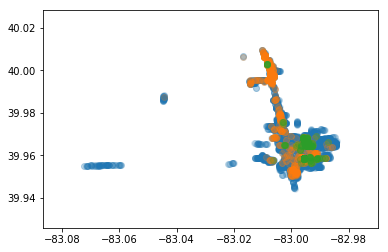

In [45]:
# PM is all meters
# finalDS is those in the sample data set
#joinedDF is those that have diff start and end dates
plt.scatter(pm["X"], pm["Y"], alpha=.1)

#joinedDF.scatter('X', "Y")
plt.scatter(finalDS["X"],finalDS["Y"],alpha=.2)
plt.scatter(joinedDF["X"], joinedDF["Y"],alpha=.3)

#finalDS.scatter('X', "Y")


In [48]:
#SEARCHING FOR PARKING DATASET
Table().read_table('urbaninfrastructure_searchingforparking_csv_searchingforparking.csv')

ParkingGeohash,AvgLatitude,AvgLongitude,City,County,State,Country,ISO_3166_2,AvgTimeToPark,AvgTimeToParkRatio,TotalSearching,PercentSearching,AvgUniqueGeohashes,AvgTotalGeohashes,CirclingDistribution,HourlyDistribution,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version
dphghs8,39.9272,-83.1215,Columbus,Franklin,Ohio,United States of America,US-OH,6.0181,1.1101,12,0.096,5.9167,8,"{""dphghs3"":0.1006, ""dphghkx"":0.0562, ""dphghs2"":0.1879, "" ...","{""00"": null, ""01"": null, ""02"": null, ""03"": 0.2, ""04"": 0. ...",0,0,0,0,0.5,0.5,2018-05-02,1.1
dphgvtg,40.066,-83.0739,Columbus,Franklin,Ohio,United States of America,US-OH,3.4738,1.0164,14,0.2029,4.3571,6.3571,"{""dphgvtf"":0.0984, ""dphgvtd"":0.1785, ""dphgvw4"":0.04, ""dp ...","{""00"": null, ""01"": null, ""02"": null, ""03"": 0.1429, ""04"": ...",0,0,0,0,0.6429,0.3571,2018-05-02,1.1
dphgupj,40.0733,-83.1368,Columbus,Franklin,Ohio,United States of America,US-OH,4.0167,1.1655,13,0.0813,5.1538,7.3846,"{""dphgupn"":0.1154, ""dphgupj"":0.3818, ""dphgunu"":0.058, ""d ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0,0,0,0.9231,0.0769,2018-05-02,1.1
dpj56ve,39.9775,-82.8437,Columbus,Franklin,Ohio,United States of America,US-OH,4.8716,3.4115,8,0.4211,4.25,6.5673,"{""dpj56ve"":0.172, ""dpj56vg"":0.2548, ""dpj56vf"":0.0628, ""d ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0.125,0,0.125,0.625,0.125,2018-05-02,1.1
dpj5391,39.9531,-82.9011,Columbus,Franklin,Ohio,United States of America,US-OH,4.6896,1.0568,8,0.1667,4.375,8.875,"{""dpj5393"":0.0191, ""dpj5390"":0.0621, ""dpj5391"":0.4065, "" ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0,0,0,0.875,0.125,2018-05-02,1.1
dphgm1f,39.9569,-83.0972,Columbus,Franklin,Ohio,United States of America,US-OH,2.9,1.2279,14,0.1707,4.7143,7,"{""dphgm1g"":0.1085, ""dphgm44"":0.1523, ""dphgm41"":0.0649, "" ...","{""00"": null, ""01"": null, ""02"": 0.2, ""03"": 0.2, ""04"": 0.2 ...",0,0,0,0,0.3571,0.6429,2018-05-02,1.1
dphgup7,40.0743,-83.1396,Columbus,Franklin,Ohio,United States of America,US-OH,3.3389,2.0977,9,0.5294,5,7.8889,"{""dphgups"":0.0296, ""dphgupk"":0.1662, ""dphgup5"":0.2132, "" ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0,0,0,0.8889,0.1111,2018-05-02,1.1
dphgwcj,39.9964,-83.0162,Columbus,Franklin,Ohio,United States of America,US-OH,7.47,1.7766,5,0.122,4.4,7.4,"{""dphgwbv"":0.0288, ""dphgwcn"":0.3225, ""dphgwby"":0.1434, "" ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0.2,0,0,0.2,0.6,2018-05-02,1.1
dpj55nh,39.9359,-82.8309,Columbus,Franklin,Ohio,United States of America,US-OH,5.8639,1.3526,6,0.1463,4.3333,7.1667,"{""dpj55nh"":0.2291, ""dpj55ju"":0.0918, ""dpj55n5"":0.0967, "" ...","{""00"": null, ""01"": 0.1667, ""02"": null, ""03"": null, ""04"": ...",0,0,0,0,0.1667,0.8333,2018-05-02,1.1
dpj4bzg,39.9022,-82.9307,Columbus,Franklin,Ohio,United States of America,US-OH,5.4069,1.3959,12,0.3636,4.3333,7.5833,"{""dpj50b4"":0, ""dpj50b5"":0.1483, ""dpj50bh"":0.0559, ""dpj4b ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0,0,0,1,0,2018-05-02,1.1


In [50]:
#FULL DATASET
full_data = pd.read_csv('parking_meter_data_2015_-_2017.csv')
full_data

C:\Users\Derek\Miniconda3\envs\ds100\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit
0,SI83,2015-01-01 00:09:24,2015-01-01 00:09:24,Cash,0.5
1,UE255,2015-01-01 00:21:22,2015-01-01 00:21:22,Cash,0.75
2,EG6,2015-01-01 00:26:42,2015-01-01 00:26:42,Cash,0.05
3,EG6,2015-01-01 00:27:02,2015-01-01 00:27:02,Cash,0.05
4,UE242,2015-01-01 00:27:16,2015-01-01 00:27:16,Cash,0.25
5,B221,2015-01-01 00:45:36,2015-01-01 00:45:36,Cash,0.1
6,UE229,2015-01-01 00:51:44,2015-01-01 00:51:44,Cash,0.3
7,SG131,2015-01-01 01:03:04,2015-01-01 01:03:04,Cash,0.8
8,SG131,2015-01-01 01:03:28,2015-01-01 01:03:28,Cash,0.5
9,SO305,2015-01-01 01:22:26,2015-01-01 01:52:26,Cash,0.7


In [89]:
#ADDING DIFFERENCE IN DATES
full_data['DifferenceAsDateTime'] = pd.to_datetime(full_data['ParkingEndDate'], errors='coerce') - pd.to_datetime(full_data['ParkingStartDate'], errors='coerce')


In [94]:
full_data['DifferenceAsDateTime'].sort_values()

0          00:00:00
3253955    00:00:00
3253956    00:00:00
3253957    00:00:00
3253958    00:00:00
3253959    00:00:00
3253961    00:00:00
15531684   00:00:00
3253962    00:00:00
3253964    00:00:00
3253965    00:00:00
3253966    00:00:00
3253967    00:00:00
3253968    00:00:00
3253969    00:00:00
3253963    00:00:00
3253953    00:00:00
3253952    00:00:00
3253951    00:00:00
3253936    00:00:00
3253937    00:00:00
3253938    00:00:00
3253939    00:00:00
3253940    00:00:00
3253941    00:00:00
3253942    00:00:00
3253943    00:00:00
3253944    00:00:00
3253945    00:00:00
3253946    00:00:00
             ...   
14557804   12:48:15
14621672   12:49:34
15029215   12:49:51
14540607   12:51:10
5848712    12:51:21
14314456   12:51:28
14726943   12:51:28
11504598   12:51:29
13324471   12:51:35
14422378   12:51:47
14817059   12:51:57
14920547   12:53:03
14877499   12:53:16
1755462    12:53:20
14835356   12:53:49
15278652   12:54:21
14791050   12:54:25
14474763   12:55:22
14663275   12:55:28


In [102]:
full_data = full_data.drop([1523047, 3195633,4863068])

In [105]:
full_data.loc[0][5]

Timedelta('0 days 00:00:00')

In [117]:
#NUMBER OF PARKED BY METTER
full_data.groupby("Pole").count().sort_values(by=["TotalCredit"])#[["TotalCredit"]].hist()

,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime
Pole,,,,,
EZ577,1,1,1,1,1
EZ579,1,1,1,1,1
EZ573,2,2,2,2,2
EZ581,2,2,2,2,2
EZ575,3,3,3,3,3
EZ567,4,4,4,4,4
EZ583,5,5,5,5,5
NL111,6,6,6,6,6
EZ571,7,7,7,7,7


In [121]:
#MOST COMMON METER
uw97 = Table().from_df(full_data.loc[full_data['Pole'] == "UW97"])
uw97

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime
UW97,2015-01-02 07:58:22,2015-01-02 08:15:01,Cash,0.25,0 days 00:16:39
UW97,2015-01-02 08:15:13,2015-01-02 08:30:13,Cash,0.25,0 days 00:15:00
UW97,2015-01-02 08:47:03,2015-01-02 09:02:03,Cash,0.25,0 days 00:15:00
UW97,2015-01-02 10:41:17,2015-01-02 10:47:17,Cash,0.1,0 days 00:06:00
UW97,2015-01-02 11:07:37,2015-01-02 11:22:37,Cash,0.25,0 days 00:15:00
UW97,2015-01-02 11:22:47,2015-01-02 11:52:47,Cash,0.5,0 days 00:30:00
UW97,2015-01-02 12:01:45,2015-01-02 12:19:45,Cash,0.3,0 days 00:18:00
UW97,2015-01-02 12:05:18,2015-01-02 12:35:18,Cash,0.5,0 days 00:30:00
UW97,2015-01-02 12:40:17,2015-01-02 13:10:17,Cash,0.5,0 days 00:30:00
UW97,2015-01-02 12:54:50,2015-01-02 13:16:17,Cash,0.1,0 days 00:21:27


In [169]:
#CLEANING TIME DATA FOR UW97
a,b,c = [],[],[]
a2,b2,c2 = [],[],[]
for each in np.arange((uw97.num_rows)):
    a.append(uw97[1][each][0:10])
    b.append(uw97[1][each][11:13])
    c.append(uw97[1][each][14:16])
    a2.append(uw97[2][each][0:10])
    b2.append(uw97[2][each][11:13])
    c2.append(uw97[2][each][14:16])
uw97 = uw97.with_columns("StartDate",a, "StartHour", b, "StartMinute", c, "EndDate",a2, "EndHour", b2, "EndMinute", c2)
uw97.group('StartHour').show()

StartHour,count
00,2
01,2
06,19
07,185
08,1159
09,1223
10,1484
11,1840
12,1793
13,1752


In [154]:
# HOW MANY ON EASCH DATE IN EACH HOUR
uw97.groups(["StartDate", "Hour"]).sort("count",descending=True)

StartDate,Hour,count
2015-08-12,19,8
2017-08-23,11,7
2017-08-21,09,7
2016-02-05,11,7
2015-01-16,14,7
2017-06-01,11,6
2017-04-21,18,6
2017-01-09,16,6
2016-11-29,13,6
2016-11-11,12,6


In [155]:
#LITTLE DATA PROBLEM
uw97.where('StartDate', are.equal_to('2015-08-12')).where('Hour', are.equal_to('19'))

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,Hour,Minute
UW97,2015-08-12 19:05:43,2015-08-12 19:20:43,Cash,0.25,0 days 00:15:00,2015-08-12,19,05
UW97,2015-08-12 19:06:09,2015-08-12 19:35:43,Cash,0.25,0 days 00:29:34,2015-08-12,19,06
UW97,2015-08-12 19:26:22,2015-08-12 19:41:43,Cash,0.1,0 days 00:15:21,2015-08-12,19,26
UW97,2015-08-12 19:34:14,2015-08-12 20:04:14,Cash,0.25,0 days 00:30:00,2015-08-12,19,34
UW97,2015-08-12 19:33:32,2015-08-12 19:56:43,Cash,0.25,0 days 00:23:11,2015-08-12,19,33
UW97,2015-08-12 19:38:59,2015-08-12 20:08:59,Cash,0.5,0 days 00:30:00,2015-08-12,19,38
UW97,2015-08-12 19:39:12,2015-08-12 20:09:12,Cash,0.25,0 days 00:30:00,2015-08-12,19,39
UW97,2015-08-12 19:39:37,2015-08-12 20:09:37,Cash,0.25,0 days 00:30:00,2015-08-12,19,39


In [312]:
#ONLY DATA FOR ONE METER
uw97

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,Hour,Minute,StartHour,StartMinute,EndDate,EndHour,EndMinute
UW97,2015-01-02 07:58:22,2015-01-02 08:15:01,Cash,0.25,0 days 00:16:39,2015-01-02,07,58,07,58,2015-01-02,08,15
UW97,2015-01-02 08:15:13,2015-01-02 08:30:13,Cash,0.25,0 days 00:15:00,2015-01-02,08,15,08,15,2015-01-02,08,30
UW97,2015-01-02 08:47:03,2015-01-02 09:02:03,Cash,0.25,0 days 00:15:00,2015-01-02,08,47,08,47,2015-01-02,09,02
UW97,2015-01-02 10:41:17,2015-01-02 10:47:17,Cash,0.1,0 days 00:06:00,2015-01-02,10,41,10,41,2015-01-02,10,47
UW97,2015-01-02 11:07:37,2015-01-02 11:22:37,Cash,0.25,0 days 00:15:00,2015-01-02,11,07,11,07,2015-01-02,11,22
UW97,2015-01-02 11:22:47,2015-01-02 11:52:47,Cash,0.5,0 days 00:30:00,2015-01-02,11,22,11,22,2015-01-02,11,52
UW97,2015-01-02 12:01:45,2015-01-02 12:19:45,Cash,0.3,0 days 00:18:00,2015-01-02,12,01,12,01,2015-01-02,12,19
UW97,2015-01-02 12:05:18,2015-01-02 12:35:18,Cash,0.5,0 days 00:30:00,2015-01-02,12,05,12,05,2015-01-02,12,35
UW97,2015-01-02 12:40:17,2015-01-02 13:10:17,Cash,0.5,0 days 00:30:00,2015-01-02,12,40,12,40,2015-01-02,13,10
UW97,2015-01-02 12:54:50,2015-01-02 13:16:17,Cash,0.1,0 days 00:21:27,2015-01-02,12,54,12,54,2015-01-02,13,16


In [162]:
#Looking at nearby meteres to uw97
uw95 = Table().from_df(full_data.loc[full_data['Pole'] == "UW95"])

a,b,c = [],[],[]
for each in np.arange((uw95.num_rows)):
    a.append(uw95[1][each][0:10])
    b.append(uw95[1][each][11:13])
    c.append(uw95[1][each][14:16])
uw95 = uw95.with_columns("StartDate",a, "Hour", b, "Minute", c)

uw95.where('StartDate', are.equal_to('2015-08-12')).where('Hour', are.equal_to('19'))

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,Hour,Minute
UW95,2015-08-12 19:01:50,2015-08-12 19:31:50,Cash,0.5,0 days 00:30:00,2015-08-12,19,01
UW95,2015-08-12 19:19:25,2015-08-12 19:49:25,Cash,0.5,0 days 00:30:00,2015-08-12,19,19
UW95,2015-08-12 19:29:49,2015-08-12 19:59:49,Cash,0.25,0 days 00:30:00,2015-08-12,19,29


In [163]:
#Looking at nearby meteres to uw97
uw99 = Table().from_df(full_data.loc[full_data['Pole'] == "UW99"])


a,b,c = [],[],[]
for each in np.arange((uw99.num_rows)):
    a.append(uw99[1][each][0:10])
    b.append(uw99[1][each][11:13])
    c.append(uw99[1][each][14:16])
uw99 = uw99.with_columns("StartDate",a, "Hour", b, "Minute", c)


uw99.where('StartDate', are.equal_to('2015-08-12')).where('Hour', are.equal_to('19'))

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,Hour,Minute
UW99,2015-08-12 19:42:46,2015-08-12 20:02:46,Credit Card,0.25,0 days 00:20:00,2015-08-12,19,42


In [159]:
#Looking at nearby meteres to uw97
pm.where("METER_ID", are.containing("UW")).show()

X,Y,OBJECTID,METER_ID,LOCATION,SIDE_OF_STREET,BLOCKFACE,METER_STATUS,TOW_AWAY_HOURS,METER_TIME,HANDICAP,HOURS_OPERATION,IN_SERVICE,VALET_HOURS,RATE,FOOD_SERVICE_HOURS,TAXI_ZONE_HOURS,CHARGING_STATION,CHARGING_STATION_STATUS
-83.0072,39.9929,6570,UW5,NINTH AVE W,South,HIGH ST - WALL ST,Operational,None,180,0,8 AM - 10 PM,14,nan,$2.25,nan,nan,No,nan
-83.0072,39.9929,6571,UW7,NINTH AVE W,South,HIGH ST - WALL ST,Operational,None,180,0,8 AM - 10 PM,14,nan,$2.25,nan,nan,No,nan
-83.0072,39.9941,7031,UW50,TENTH AVE W,North,HIGH ST - WALL ST,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0073,39.9941,7032,UW52,TENTH AVE W,North,HIGH ST - WALL ST,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0074,39.9941,7033,UW54,TENTH AVE W,North,HIGH ST - WALL ST,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0142,39.9935,6675,UW900,NEIL AVE N,East,NINTH AVE - TENTH AVE,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0144,39.9935,6676,UW901,NEIL AVE N,West,NINTH AVE - TENTH AVE,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0142,39.9935,6677,UW902,NEIL AVE N,East,NINTH AVE - TENTH AVE,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0144,39.9936,6678,UW903,NEIL AVE N,West,NINTH AVE - TENTH AVE,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan
-83.0142,39.9936,6679,UW904,NEIL AVE N,East,NINTH AVE - TENTH AVE,Operational,nan,120,0,8 AM - 10 PM,14,nan,$1.50,nan,nan,No,nan


In [171]:
#Looking at one date for uw97
uw97.where('StartDate', are.equal_to('2015-08-12')).show()

Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,Hour,Minute,StartHour,StartMinute,EndDate,EndHour,EndMinute
UW97,2015-08-12 08:09:41,2015-08-12 08:24:41,Cash,0.25,0 days 00:15:00,2015-08-12,08,09,08,09,2015-08-12,08,24
UW97,2015-08-12 08:34:39,2015-08-12 08:42:23,Cash,0.1,0 days 00:07:44,2015-08-12,08,34,08,34,2015-08-12,08,42
UW97,2015-08-12 08:30:23,2015-08-12 08:36:23,Cash,0.1,0 days 00:06:00,2015-08-12,08,30,08,30,2015-08-12,08,36
UW97,2015-08-12 09:01:18,2015-08-12 09:31:18,Credit Card,0.5,0 days 00:30:00,2015-08-12,09,01,09,01,2015-08-12,09,31
UW97,2015-08-12 09:32:43,2015-08-12 09:38:43,Cash,0.1,0 days 00:06:00,2015-08-12,09,32,09,32,2015-08-12,09,38
UW97,2015-08-12 09:47:42,2015-08-12 10:17:42,Cash,0.5,0 days 00:30:00,2015-08-12,09,47,09,47,2015-08-12,10,17
UW97,2015-08-12 10:36:21,2015-08-12 11:06:21,Cash,0.5,0 days 00:30:00,2015-08-12,10,36,10,36,2015-08-12,11,06
UW97,2015-08-12 11:47:11,2015-08-12 12:17:11,Cash,0.5,0 days 00:30:00,2015-08-12,11,47,11,47,2015-08-12,12,17
UW97,2015-08-12 12:37:54,2015-08-12 12:52:54,Cash,0.25,0 days 00:15:00,2015-08-12,12,37,12,37,2015-08-12,12,52
UW97,2015-08-12 12:41:48,2015-08-12 13:04:54,Cash,0.2,0 days 00:23:06,2015-08-12,12,41,12,41,2015-08-12,13,04


In [216]:
#THIS GETS ALL THE TIMES
times = []
for eachH in np.arange(8,22):
    for eachM in np.arange(0,60):
        times.append([eachH, eachM])
len(times)

840

In [217]:
#DONT RUN.
#THIS TELLS YOU JSUT WHEN uw97 IS OPEN
def when_is_the_station_open:
    
    temp = full_data.where("Pole", are.equal_to("UW97")).where('StartDate', are.equal_to('2015-08-12')).select(9,10, 12,13)
    lst = []
    timechecktest = []
    for time_tobe_checked in times:
        for each in np.arange(temp.num_rows):

            # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                    # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                        # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)

            if (int(temp[0][each]) == int(time_tobe_checked[0])) & (int(temp[2][each]) == int(time_tobe_checked[0])):
                if (int(time_tobe_checked[1]) >= int(temp[1][each])):
                    if (int(time_tobe_checked[1]) <= int(temp[3][each])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")
                else:
                    lst.append("Open")

             # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                # THEN IF START MIN IS LESS OR EQUAL - TRUE
                # ELSE FALSE

            elif (int(temp[0][each]) == int(time_tobe_checked[0])) & (int(temp[2][each]) != int(time_tobe_checked[0])):
                if (int(time_tobe_checked[1]) >= int(temp[1][each])):
                    lst.append("Taken")
                    #print(time_tobe_checked)
                    timechecktest.append(time_tobe_checked)
                else:
                    lst.append("Open")

            # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                # THEN IF END MIN IS MORE OR EQUAL - TRUE
                # ELSE FALSE


            elif (int(temp[0][each]) != int(time_tobe_checked[0])) & (int(temp[2][each]) == int(time_tobe_checked[0])):
                if (int(time_tobe_checked[1]) <= int(temp[3][each])):
                    lst.append("Taken")
                    #print(time_tobe_checked)
                    timechecktest.append(time_tobe_checked)
                else:
                    lst.append("Open")

        # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
            else:
                lst.append("Open")
    for each in times:
        if each in timechecktest:
            print("Taken - ",each)
        else:
            print("Open - ",each)



[[8, 9],
 [8, 10],
 [8, 11],
 [8, 12],
 [8, 13],
 [8, 14],
 [8, 15],
 [8, 16],
 [8, 17],
 [8, 18],
 [8, 19],
 [8, 20],
 [8, 21],
 [8, 22],
 [8, 23],
 [8, 24],
 [8, 30],
 [8, 31],
 [8, 32],
 [8, 33],
 [8, 34],
 [8, 34],
 [8, 35],
 [8, 35],
 [8, 36],
 [8, 36],
 [8, 37],
 [8, 38],
 [8, 39],
 [8, 40],
 [8, 41],
 [8, 42],
 [9, 1],
 [9, 2],
 [9, 3],
 [9, 4],
 [9, 5],
 [9, 6],
 [9, 7],
 [9, 8],
 [9, 9],
 [9, 10],
 [9, 11],
 [9, 12],
 [9, 13],
 [9, 14],
 [9, 15],
 [9, 16],
 [9, 17],
 [9, 18],
 [9, 19],
 [9, 20],
 [9, 21],
 [9, 22],
 [9, 23],
 [9, 24],
 [9, 25],
 [9, 26],
 [9, 27],
 [9, 28],
 [9, 29],
 [9, 30],
 [9, 31],
 [9, 32],
 [9, 33],
 [9, 34],
 [9, 35],
 [9, 36],
 [9, 37],
 [9, 38],
 [9, 47],
 [9, 48],
 [9, 49],
 [9, 50],
 [9, 51],
 [9, 52],
 [9, 53],
 [9, 54],
 [9, 55],
 [9, 56],
 [9, 57],
 [9, 58],
 [9, 59],
 [10, 0],
 [10, 1],
 [10, 2],
 [10, 3],
 [10, 4],
 [10, 5],
 [10, 6],
 [10, 7],
 [10, 8],
 [10, 9],
 [10, 10],
 [10, 11],
 [10, 12],
 [10, 13],
 [10, 14],
 [10, 15],
 [10, 16],
 [1

In [218]:
#DONT RUN
#THIS TELLS YOU IF IT THE UW97 WAS OPEN AT EACH TIME ON 8/12/15
for each in times:
    if each in timechecktest:
        print("Taken - ",each)
    else:
        print("Open - ",each)

Open -  [8, 0]
Open -  [8, 1]
Open -  [8, 2]
Open -  [8, 3]
Open -  [8, 4]
Open -  [8, 5]
Open -  [8, 6]
Open -  [8, 7]
Open -  [8, 8]
Taken -  [8, 9]
Taken -  [8, 10]
Taken -  [8, 11]
Taken -  [8, 12]
Taken -  [8, 13]
Taken -  [8, 14]
Taken -  [8, 15]
Taken -  [8, 16]
Taken -  [8, 17]
Taken -  [8, 18]
Taken -  [8, 19]
Taken -  [8, 20]
Taken -  [8, 21]
Taken -  [8, 22]
Taken -  [8, 23]
Taken -  [8, 24]
Open -  [8, 25]
Open -  [8, 26]
Open -  [8, 27]
Open -  [8, 28]
Open -  [8, 29]
Taken -  [8, 30]
Taken -  [8, 31]
Taken -  [8, 32]
Taken -  [8, 33]
Taken -  [8, 34]
Taken -  [8, 35]
Taken -  [8, 36]
Taken -  [8, 37]
Taken -  [8, 38]
Taken -  [8, 39]
Taken -  [8, 40]
Taken -  [8, 41]
Taken -  [8, 42]
Open -  [8, 43]
Open -  [8, 44]
Open -  [8, 45]
Open -  [8, 46]
Open -  [8, 47]
Open -  [8, 48]
Open -  [8, 49]
Open -  [8, 50]
Open -  [8, 51]
Open -  [8, 52]
Open -  [8, 53]
Open -  [8, 54]
Open -  [8, 55]
Open -  [8, 56]
Open -  [8, 57]
Open -  [8, 58]
Open -  [8, 59]
Open -  [9, 0]
Taken 

In [186]:
temp = uw97.where('StartDate', are.equal_to('2015-08-12')).select(9,10, 12,13)

t1 = temp.take(0)
t1

In [192]:
if t1[0] == t1[2]:
    print(np.arange(int(t1[1]), int(t1[3])))

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [291]:
a,b,c = [],[],[]
a2,b2,c2 = [],[],[]
for each in np.arange(len(full_data)):
    if each not in [1523047, 3195633,4863068]:
        a.append(full_data["ParkingStartDate"][each][0:10])
        b.append(full_data["ParkingStartDate"][each][11:13])
        c.append(full_data["ParkingStartDate"][each][14:16])
        a2.append(full_data["ParkingEndDate"][each][0:10])
        b2.append(full_data["ParkingEndDate"][each][11:13])
        c2.append(full_data["ParkingEndDate"][each][14:16])
    else: 
        a.append(full_data["ParkingStartDate"][0][0:10])
        b.append(full_data["ParkingStartDate"][0][11:13])
        c.append(full_data["ParkingStartDate"][0][14:16])
        a2.append(full_data["ParkingEndDate"][0][0:10])
        b2.append(full_data["ParkingEndDate"][0][11:13])
        c2.append(full_data["ParkingEndDate"][0][14:16])
full_data["StartDate"] = a
full_data["StartHour"] =  b
full_data["StartMinute"] =  c
full_data[ "EndDate"] = a2 
full_data["EndHour"] =  b2 
full_data["EndMinute"] =  c2
          
full_data.head(5)

,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,StartHour,StartMinute,EndDate,EndHour,EndMinute
0,SI83,2015-01-01 00:09:24,2015-01-01 00:09:24,Cash,0.5,0 days,2015-01-01,00,09,2015-01-01,00,09
1,UE255,2015-01-01 00:21:22,2015-01-01 00:21:22,Cash,0.75,0 days,2015-01-01,00,21,2015-01-01,00,21
2,EG6,2015-01-01 00:26:42,2015-01-01 00:26:42,Cash,0.05,0 days,2015-01-01,00,26,2015-01-01,00,26
3,EG6,2015-01-01 00:27:02,2015-01-01 00:27:02,Cash,0.05,0 days,2015-01-01,00,27,2015-01-01,00,27
4,UE242,2015-01-01 00:27:16,2015-01-01 00:27:16,Cash,0.25,0 days,2015-01-01,00,27,2015-01-01,00,27


In [288]:
full_data.head()

,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime
0,SI83,2015-01-01 00:09:24,2015-01-01 00:09:24,Cash,0.5,00:00:00
1,UE255,2015-01-01 00:21:22,2015-01-01 00:21:22,Cash,0.75,00:00:00
2,EG6,2015-01-01 00:26:42,2015-01-01 00:26:42,Cash,0.05,00:00:00
3,EG6,2015-01-01 00:27:02,2015-01-01 00:27:02,Cash,0.05,00:00:00
4,UE242,2015-01-01 00:27:16,2015-01-01 00:27:16,Cash,0.25,00:00:00
5,B221,2015-01-01 00:45:36,2015-01-01 00:45:36,Cash,0.1,00:00:00
6,UE229,2015-01-01 00:51:44,2015-01-01 00:51:44,Cash,0.3,00:00:00
7,SG131,2015-01-01 01:03:04,2015-01-01 01:03:04,Cash,0.8,00:00:00
8,SG131,2015-01-01 01:03:28,2015-01-01 01:03:28,Cash,0.5,00:00:00
9,SO305,2015-01-01 01:22:26,2015-01-01 01:52:26,Cash,0.7,00:30:00


In [284]:
full_data["ParkingStartDate"][1523047]

KeyError: 1523047

# SO BASICALLY AT THIS POINT, WE ARE LOOKING AT ALL OF THE DATES/TIMES FOR METER UW97 and seeing when it was open/taken

# AGAIN, JUST READ THE CODE. DONT RUN.

In [235]:
def when_is_the_station_open(pole, date):
    
    temp = full_data.where("Pole", are.equal_to(pole)).where('StartDate', are.equal_to(date)).select(9,10, 12,13)
  
    lst_of_lsts = []
    for helper in np.unique(uw97["StartDate"]):
        print(helper)
        temp1 = uw97.where('StartDate', are.equal_to(helper)).select(9,10, 12,13)
        lst = []
        timechecktest = []
        ans = []
        for time_tobe_checked in times:
            for each in np.arange(temp1.num_rows):

                # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                        # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                            # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)

                if (int(temp1[0][each]) == int(time_tobe_checked[0])) & (int(temp1[2][each]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1[1][each])):
                        if (int(time_tobe_checked[1]) <= int(temp1[3][each])):
                            lst.append("Taken")
                            #print(time_tobe_checked)
                            timechecktest.append(time_tobe_checked)
                        else:
                            lst.append("Open")
                    else:
                        lst.append("Open")

                 # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                    # THEN IF START MIN IS LESS OR EQUAL - TRUE
                    # ELSE FALSE

                elif (int(temp1[0][each]) == int(time_tobe_checked[0])) & (int(temp1[2][each]) != int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1[1][each])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

                # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                    # THEN IF END MIN IS MORE OR EQUAL - TRUE
                    # ELSE FALSE


                elif (int(temp1[0][each]) != int(time_tobe_checked[0])) & (int(temp1[2][each]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) <= int(temp1[3][each])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

            # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
                else:
                    lst.append("Open")
        for each_ in times:
            if each_ in timechecktest:
                #print("Taken - ",each_)
                ans.append([1,each_])
            else:
                #print("Open - ",each_)
                ans.append([0,each_])
        lst_of_lsts.append(ans)

2015-01-02
2015-01-03
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-17
2015-01-19
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-24
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-01-31
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-07
2015-02-09
2015-02-10
2015-02-11
2015-02-12
2015-02-13
2015-02-14
2015-02-15
2015-02-16
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-21
2015-02-22
2015-02-23
2015-02-24
2015-02-25
2015-02-26
2015-02-27
2015-02-28
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-07
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-14
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-21
2015-03-22
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-27
2015-03-28
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-04
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-11
2015-04-12

In [220]:
np.unique(uw97["StartDate"])

array(['2015-01-02', '2015-01-03', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14',
       '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-19',
       '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23',
       '2015-01-24', '2015-01-26', '2015-01-27', '2015-01-28',
       '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-02',
       '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06',
       '2015-02-07', '2015-02-09', '2015-02-10', '2015-02-11',
       '2015-02-12', '2015-02-13', '2015-02-14', '2015-02-15',
       '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19',
       '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23',
       '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27',
       '2015-02-28', '2015-03-02', '2015-03-03', '2015-03-04',
       '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-09',
       '2015-03-10', '2015-03-11', '2015-03-12', '2015-

In [234]:
print(lst_of_lsts[0][355][0])
print(lst_of_lsts[1][355][0])
print(lst_of_lsts[2][355][0])
print(lst_of_lsts[3][355][0])
print(lst_of_lsts[4][355][0])

Taken 
Taken 
Open 
Taken 
Taken 


# OK SO, THIS NEXT CODE BLOCK IS THE DISTRIBUTION OF PARKED PEOPLE AT THE METTER FOR EVERY TIME FROM 8AM-10PM FOR 3 YEARS. THE NUMBERS ARE THE PROPORTION OF TIME IT WAS OPEN AT EACH TIME.

# Note ITS PLOTTED IN THE NEXT SECTION.

In [249]:

summ = len(np.unique(uw97["StartDate"]))
runningcount = 0
runningcountl = []

for each in np.arange(840):
    runningcount = 0
    for each2 in np.arange(summ):
        runningcount += lst_of_lsts[each2][each][0]
    runningcountl.append(runningcount/summ)

runningcountl

[0.21177685950413222,
 0.246900826446281,
 0.2665289256198347,
 0.2892561983471074,
 0.30165289256198347,
 0.31611570247933884,
 0.3357438016528926,
 0.32541322314049587,
 0.3347107438016529,
 0.3440082644628099,
 0.34297520661157027,
 0.3584710743801653,
 0.36363636363636365,
 0.36363636363636365,
 0.37293388429752067,
 0.381198347107438,
 0.33161157024793386,
 0.32334710743801653,
 0.32644628099173556,
 0.3243801652892562,
 0.3274793388429752,
 0.33264462809917356,
 0.32334710743801653,
 0.3202479338842975,
 0.33161157024793386,
 0.33264462809917356,
 0.33884297520661155,
 0.3357438016528926,
 0.3305785123966942,
 0.3357438016528926,
 0.3481404958677686,
 0.31714876033057854,
 0.30785123966942146,
 0.3181818181818182,
 0.31921487603305787,
 0.3243801652892562,
 0.3285123966942149,
 0.31921487603305787,
 0.32334710743801653,
 0.3367768595041322,
 0.33987603305785125,
 0.34710743801652894,
 0.34607438016528924,
 0.36260330578512395,
 0.371900826446281,
 0.36983471074380164,
 0.37293388

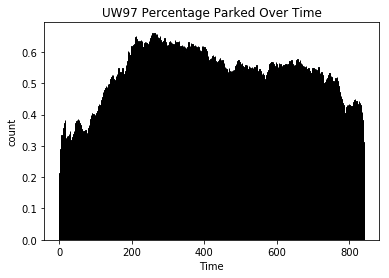

In [259]:

import numpy as np
import random
from matplotlib import pyplot as plt

data = runningcountl

n = np.arange(840)

# fixed bin size
#bins = np.arange(0, 1, .05) # fixed bin size

#plt.xlim([min(data)-.05, max(data)+.05])

plt.bar(n, height=data)
plt.title('UW97 Percentage Parked Over Time')
plt.xlabel('Time')
plt.ylabel('count')

plt.show()


#runningcountl.hist()

[968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968,
 968

In [340]:
# TIMES IN OPERATION
times_op = []
for eachH in np.arange(6,22):
    for eachM in np.arange(0,60):
        times_op.append([eachH, eachM])
len(times_op)

960

In [346]:
#THIS CODE NEEDS TO BE ADJUSTED BUT BASICALLY IT GOES THROUGH EVERY TIME IN OPERATION, 
# FOR EVERY DATE FOR A SPECIFIC METER AND TELLS YOU THE PROPORTION OF TIME THAT METER WAS OPEN VS TAKEN..
# IMPORTANT. REALLY IMPORTANT.


def when_is_the_station_open(pole):
    
    temp = full_data[full_data["Pole"] == pole]
  
    lst_of_lsts = []
    for helper in np.unique(full_data["StartDate"]):
        #print(helper)
        temp1 = temp[temp["StartDate"] == helper][['StartHour','StartMinute','EndHour','EndMinute']]
        lst = []
        timechecktest = []
        ans = []
        for time_tobe_checked in times_op:
            for each in np.arange(len(temp1)):

                # IF START HOUR IS THE SAME AND IF END HOUR IS THE SAME
                        # THEN IF START MIN IS LESS OR EQUAL  (ELSE FALSE)
                            # THEN IF END MIN IS MORE OR EQUAL - TRUE (ELSE FALSE)
                     
                     #b1temp1.iloc[0]["StartHour"]

                if (int(temp1.iloc[each]["StartHour"]) == int(time_tobe_checked[0])) & (int(temp1.iloc[each]["EndHour"]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1.iloc[each]["StartMinute"])):
                        if (int(time_tobe_checked[1]) <= int(temp1.iloc[each]["EndMinute"])):
                            lst.append("Taken")
                            #print(time_tobe_checked)
                            timechecktest.append(time_tobe_checked)
                        else:
                            lst.append("Open")
                    else:
                        lst.append("Open")

                 # IF START HOUR IS SAME AND END HOUR IS DIFFERENT
                    # THEN IF START MIN IS LESS OR EQUAL - TRUE
                    # ELSE FALSE

                elif (int(temp1.iloc[each]["StartHour"]) == int(time_tobe_checked[0])) & (int(temp1.iloc[each]["EndHour"]) != int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) >= int(temp1.iloc[each]["StartMinute"])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

                # IF START HOUR IS DIFFERENT AND END HOUR IS SAME 
                    # THEN IF END MIN IS MORE OR EQUAL - TRUE
                    # ELSE FALSE


                elif (int(temp1.iloc[each]["StartHour"]) != int(time_tobe_checked[0])) & (int(temp1.iloc[each]["EndHour"]) == int(time_tobe_checked[0])):
                    if (int(time_tobe_checked[1]) <= int(temp1.iloc[each]["EndMinute"])):
                        lst.append("Taken")
                        #print(time_tobe_checked)
                        timechecktest.append(time_tobe_checked)
                    else:
                        lst.append("Open")

            # IF START HOUR IS DIFFERENT AND END HOUR IS DIFFERENT - AUTO FALSE
                else:
                    lst.append("Open")
        for each_ in times_op:
            if each_ in timechecktest:
                #print("Taken - ",each_)
                ans.append([1,each_])
            else:
                #print("Open - ",each_)
                ans.append([0,each_])
        lst_of_lsts.append(ans)
    return lst_of_lsts


In [347]:
#RUNS THROUGH FOR EVERY METER.
lst_of_lsts_of_lsts = []
for each in poles_list:
    print(each)
    lst_of_lsts_of_lsts.append(when_is_the_station_open(each))
lst_of_lsts_of_lsts

B1
B10
B100
B102


KeyboardInterrupt: 

In [298]:
poles_list = np.unique(full_data["Pole"])
len(poles_list)

5030

In [308]:
#LIST OF METERS
poles_list

array(['B1', 'B10', 'B100', ..., 'WX175', 'WX177', 'WX179'], dtype=object)

In [313]:
b1 = full_data[full_data["Pole"] == "B1"]
b1
#.where("Pole", are.equal_to('B1'))

,Pole,ParkingStartDate,ParkingEndDate,TransactionType,TotalCredit,DifferenceAsDateTime,StartDate,StartHour,StartMinute,EndDate,EndHour,EndMinute
4807,B1,2015-01-02 11:53:31,2015-01-02 12:13:31,Cash,0.25,00:20:00,2015-01-02,11,53,2015-01-02,12,13
5717,B1,2015-01-02 12:27:27,2015-01-02 14:27:27,Cash,1.5,02:00:00,2015-01-02,12,27,2015-01-02,14,27
10542,B1,2015-01-02 15:40:02,2015-01-02 16:04:02,Cash,0.3,00:24:00,2015-01-02,15,40,2015-01-02,16,04
32967,B1,2015-01-03 16:15:05,2015-01-03 17:39:05,Cash,1.05,01:24:00,2015-01-03,16,15,2015-01-03,17,39
36772,B1,2015-01-05 08:48:47,2015-01-05 11:08:47,Credit Card,1.75,02:20:00,2015-01-05,08,48,2015-01-05,11,08
37991,B1,2015-01-05 09:59:59,2015-01-05 12:16:48,Cash,0.85,02:16:49,2015-01-05,09,59,2015-01-05,12,16
40434,B1,2015-01-05 12:06:56,2015-01-05 14:36:48,Cash,1.75,02:29:52,2015-01-05,12,06,2015-01-05,14,36
45274,B1,2015-01-05 15:27:10,2015-01-05 15:35:10,Cash,0.1,00:08:00,2015-01-05,15,27,2015-01-05,15,35
54106,B1,2015-01-06 08:52:06,2015-01-06 10:00:06,Cash,0.85,01:08:00,2015-01-06,08,52,2015-01-06,10,00
54535,B1,2015-01-06 09:25:14,2015-01-06 10:40:05,Credit Card,0.5,01:14:51,2015-01-06,09,25,2015-01-06,10,40


In [317]:
b1temp1 = b1[b1["StartDate"] == '2015-01-02'][['StartHour','StartMinute','EndHour','EndMinute']]
b1temp1

,StartHour,StartMinute,EndHour,EndMinute
4807,11,53,12,13
5717,12,27,14,27
10542,15,40,16,04


In [337]:
b1temp1.iloc[0]["StartHour"]
#b1temp1["StartHour"][4807]

'11'

# USING SEARCHING FOR PARKING DATA.

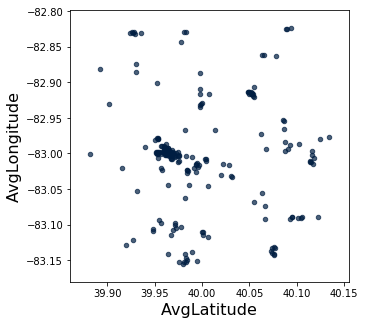

In [262]:
searchingForParking = Table().read_table('urbaninfrastructure_searchingforparking_csv_searchingforparking.csv')
searchingForParking.scatter("AvgLatitude","AvgLongitude")

In [270]:
searchingForParking.where("PercentSearching", are.above(.5))

ParkingGeohash,AvgLatitude,AvgLongitude,City,County,State,Country,ISO_3166_2,AvgTimeToPark,AvgTimeToParkRatio,TotalSearching,PercentSearching,AvgUniqueGeohashes,AvgTotalGeohashes,CirclingDistribution,HourlyDistribution,PercentCar,PercentMPV,PercentLDT,PercentMDT,PercentHDT,PercentOther,UpdateDate,Version
dphgup7,40.0743,-83.1396,Columbus,Franklin,Ohio,United States of America,US-OH,3.3389,2.0977,9,0.5294,5,7.8889,"{""dphgups"":0.0296, ""dphgupk"":0.1662, ""dphgup5"":0.2132, "" ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": n ...",0,0,0,0,0.8889,0.1111,2018-05-02,1.1
dpj591q,39.998,-82.9161,Columbus,Franklin,Ohio,United States of America,US-OH,3.0306,1.025,6,0.5455,6,8,"{""dpj591x"":0.1029, ""dpj591w"":0.0703, ""dpj591m"":0.1932, "" ...","{""00"": null, ""01"": null, ""02"": null, ""03"": null, ""04"": 0 ...",0.3333,0.5,0.1667,0,0,0,2018-05-02,1.1


In [265]:
searchingForParking["HourlyDistribution"]

array(['{"00": null, "01": null, "02": null, "03": 0.2, "04": 0.2, "05": 0.2, "06": 0.2, "07": null, "08": null, "09": null, "10": 0.2, "11": null, "12": null, "13": null, "14": null, "15": null, "16": null, "17": null, "18": null, "19": null, "20": null, "21": null, "22": null, "23": null}',
       '{"00": null, "01": null, "02": null, "03": 0.1429, "04": null, "05": 0.1429, "06": 0.1429, "07": 0.1429, "08": null, "09": 0.1429, "10": 0.1429, "11": 0.1429, "12": null, "13": null, "14": null, "15": null, "16": null, "17": null, "18": null, "19": null, "20": null, "21": null, "22": null, "23": null}',
       '{"00": null, "01": null, "02": null, "03": null, "04": null, "05": null, "06": null, "07": 0.2, "08": 0.2, "09": 0.2, "10": 0.2, "11": null, "12": 0.2, "13": null, "14": null, "15": null, "16": null, "17": null, "18": null, "19": null, "20": null, "21": null, "22": null, "23": null}',
       '{"00": null, "01": null, "02": null, "03": null, "04": null, "05": 0.2, "06": 0.2, "07": nu

In [ ]:
# TO DO: CAN I FIX THE TIME NOT CHANGING THING WITH MONEY PAiD